In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error

In [26]:
df = pd.read_csv('auto_imports.csv')

In [3]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [4]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.describe(include = "O")

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,201,201,201,199,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,113,94,118,198,145,157,92


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [7]:
df.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [27]:
for x in df.columns:
        if df[x].dtype in ['int', 'float']:
            df.loc[df[x].isnull(), x] = df[x].mean()
        else:
            df.loc[df[x].isnull(), x] = df[x].mode()

C:\Users\Tarun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 3500x1500 with 0 Axes>

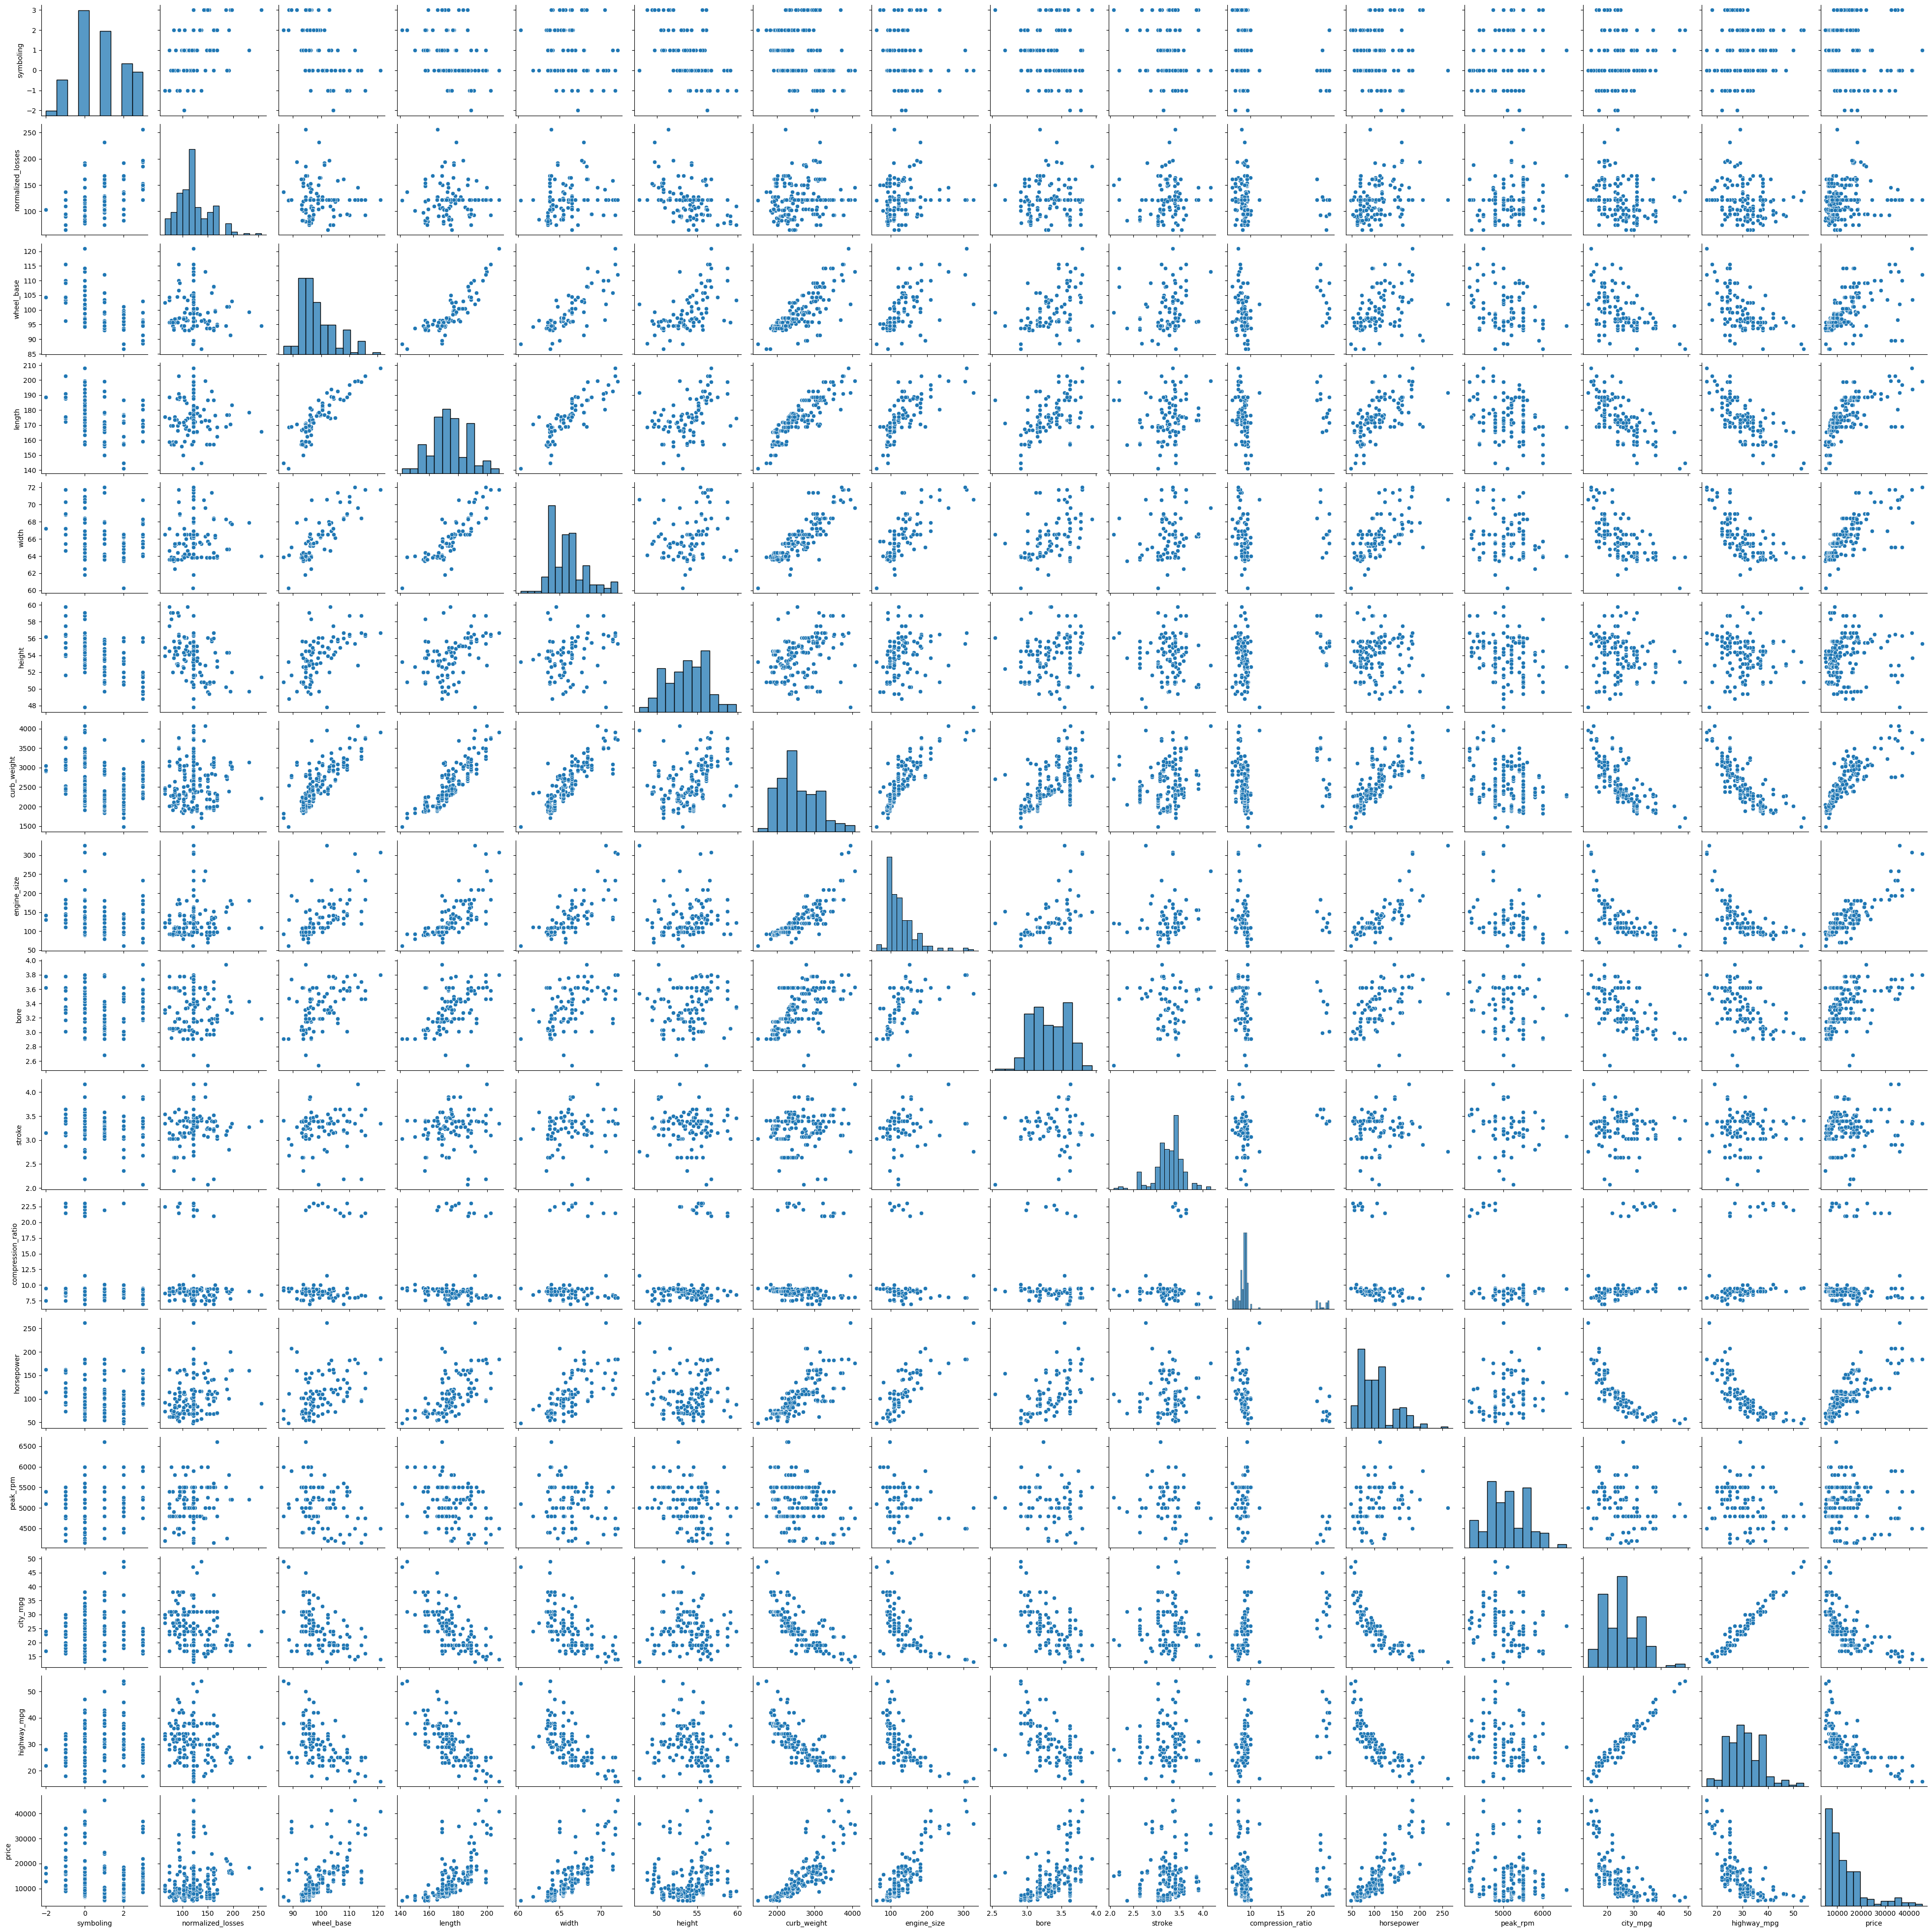

In [52]:
plt.figure(figsize=(35,15))
sns.pairplot(df)

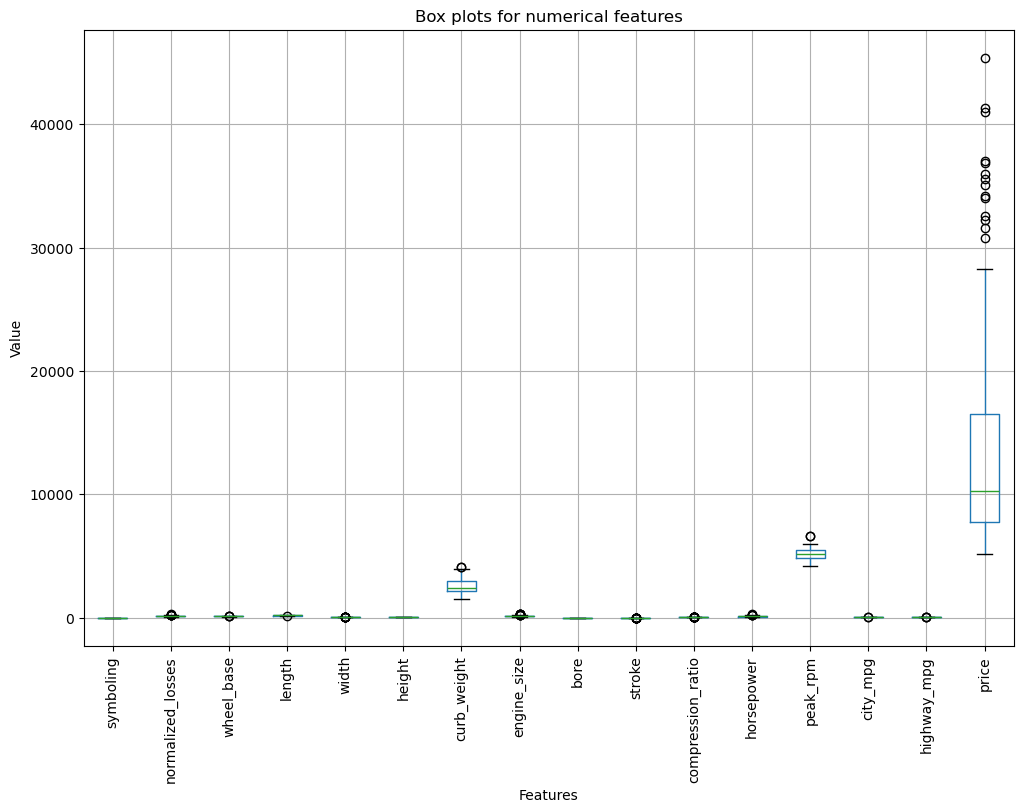

In [53]:
num_col = df.select_dtypes(include=['int', 'float']).columns

#box plots
plt.figure(figsize=(12,8))
df[num_col].boxplot()
plt.xticks(rotation=90)
plt.title('Box plots for numerical features')
plt.ylabel('Value')
plt.xlabel('Features')
plt.show()

<Axes: >

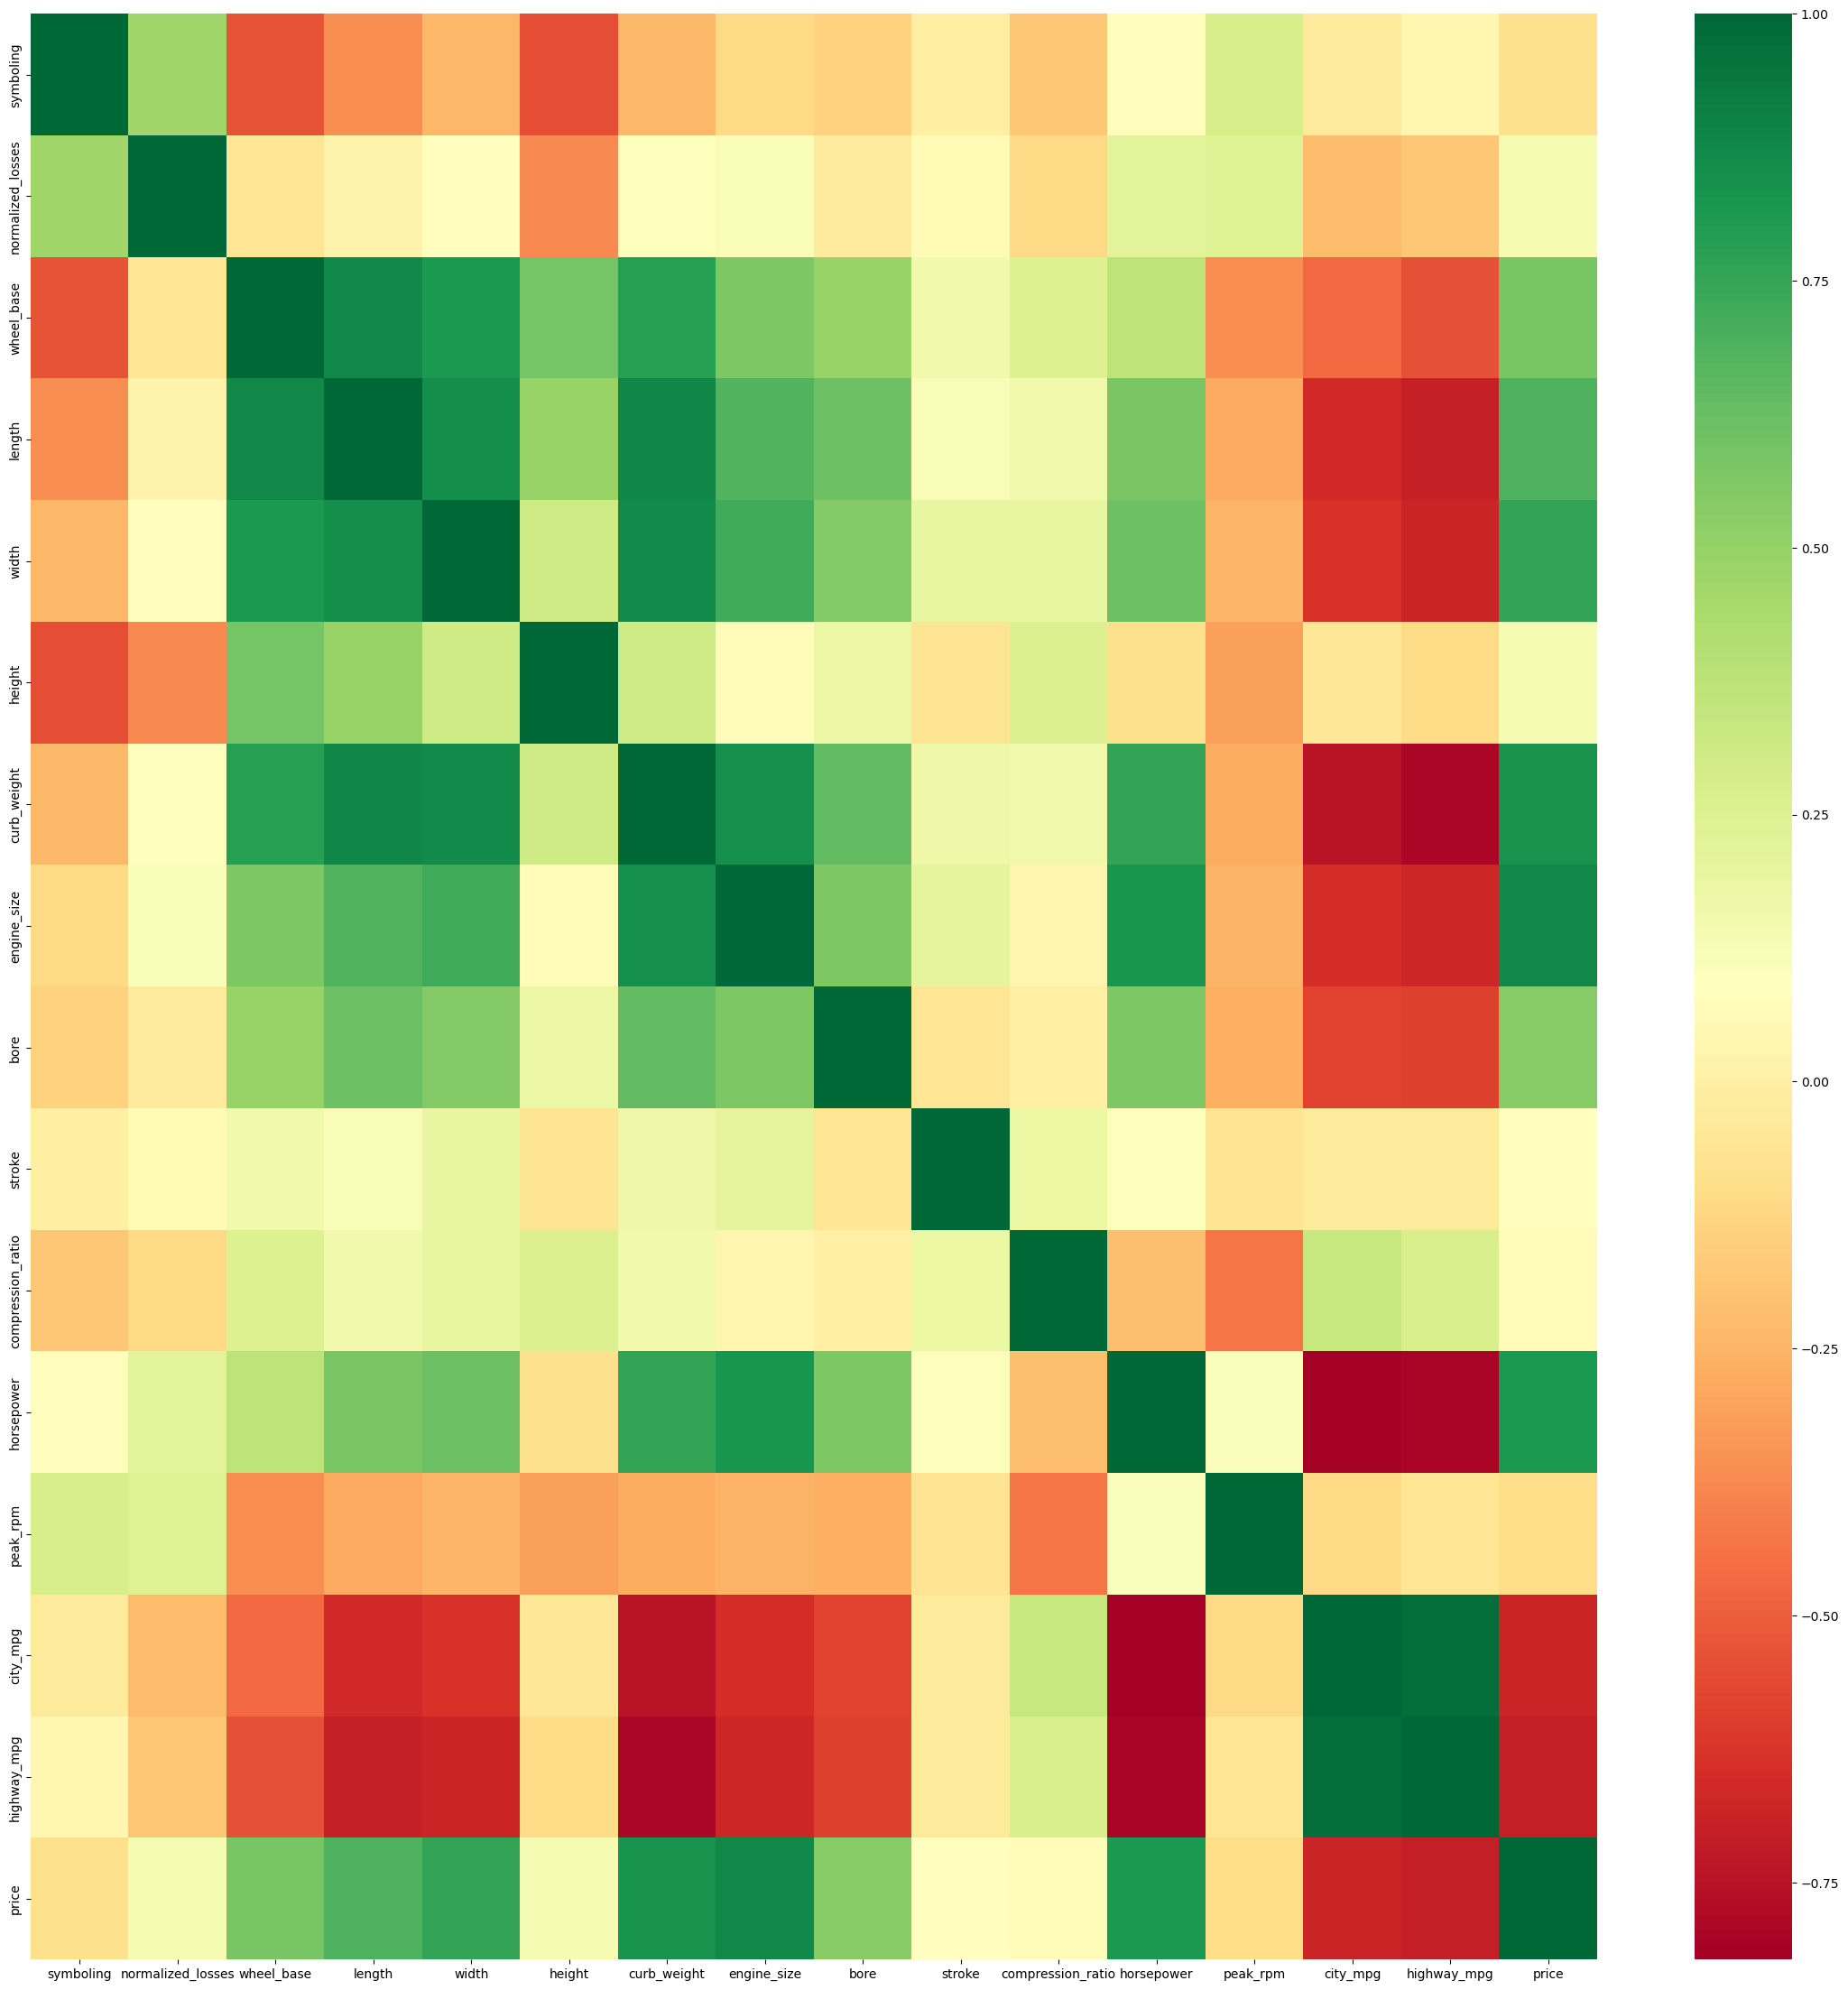

In [54]:
plt.figure(figsize=(28,28))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(),  cmap="RdYlGn")

In [9]:
for x in df.select_dtypes(include='O').columns:
    a = df[x].value_counts()
    print(f"Value count of {x} is:\n{a}\n")

Value count of make is:
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
reNaNult          2
mercury           1
Name: count, dtype: int64

Value count of fuel_type is:
fuel_type
gas       181
diesel     20
Name: count, dtype: int64

Value count of aspiration is:
aspiration
std      165
turbo     36
Name: count, dtype: int64

Value count of num_of_doors is:
num_of_doors
four    113
two      86
Name: count, dtype: int64

Value count of body_style is:
body_style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

Value count of drive_wheels is:
drive_wheels
fwd    118
rwd   

- Dropping columns which have very low corelation and engine_location which have low to no impact to avoid overfitting.

In [28]:
df = df.drop(['normalized_losses', 'symboling', 'peak_rpm', 'engine_location' , 
               'highway_mpg', 'height', 'stroke', 'compression_ratio', 'city_mpg', 'wheel_base', 'length', 'bore'], axis =1)

# preprocessing

In [29]:
OHE_columns = ['make', 'fuel_type',  'num_of_doors', 'body_style', 'engine_type',  'fuel_system',
              'aspiration', 'num_of_cylinders','drive_wheels']
standard_scaler = [ 'engine_size', 'horsepower', 'width', 'curb_weight' ]

preprocessor = ColumnTransformer([
    ("OHE columns", OneHotEncoder(sparse=False), OHE_columns),
    ("Standard_scaler", StandardScaler(), standard_scaler)])

preprocessor

ColumnTransformer(transformers=[('OHE columns', OneHotEncoder(sparse=False),
                                 ['make', 'fuel_type', 'num_of_doors',
                                  'body_style', 'engine_type', 'fuel_system',
                                  'aspiration', 'num_of_cylinders',
                                  'drive_wheels']),
                                ('Standard_scaler', StandardScaler(),
                                 ['engine_size', 'horsepower', 'width',
                                  'curb_weight'])])

# Splitting the data and Processing

In [35]:
x= df.drop("price", axis =1)
y= df.price

processed_x = preprocessor.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(processed_x,y, test_size = 0.2, random_state= 4)

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Linear Regression

In [36]:
# training the model
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)

# testing the model
r2score= r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

# print metrics
print(f"r2score: {r2score:.4f}")
print(f"MAE:     {mae:.4f}")
print(f"MSE:     {mse:.4f}")
print(f"RMSE:    {rmse:.4f}")

r2score: 0.9309
MAE:     1660.8780
MSE:     5610456.9756
RMSE:    2368.6403


# DecessionTree

In [37]:
# training model
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

#testing model
y_predict_dt = dt.predict(x_test)
r2score_dt = r2_score(y_test, y_predict_dt)
mae_dt = mean_absolute_error(y_test, y_predict_dt)
mse_dt = mean_squared_error(y_test, y_predict_dt)
rmse_dt = np.sqrt(mse_dt)

# print metrics
print(f"r2score: {r2score_dt:.4f}")
print(f"MAE:     {mae_dt:.4f}")
print(f"MSE:     {mse_dt:.4f}")
print(f"RMSE:    {rmse_dt:.4f}")

r2score: 0.9142
MAE:     1965.3171
MSE:     6961779.0244
RMSE:    2638.5183


# RandomForest

In [38]:
# training model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

#testing model
y_predict_rf = rf.predict(x_test)
r2score_rf = r2_score(y_test, y_predict_rf)
mae_rf = mean_absolute_error(y_test, y_predict_rf)
mse_rf = mean_squared_error(y_test, y_predict_rf)
rmse_rf = np.sqrt(mse_rf)

# print metrics
print(f"r2score: {r2score_rf:.4f}")
print(f"MAE:     {mae_rf:.4f}")
print(f"MSE:     {mse_rf:.4f}")
print(f"RMSE:    {rmse_rf:.4f}")

r2score: 0.9390
MAE:     1590.3358
MSE:     4954567.4446
RMSE:    2225.8858


In [39]:
print("linear regression")
print(f'r2: {r2score:.5f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}')

print("\nDecessionTree")
print(f'r2: {r2score_dt:.5f}, MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, RMSE: {rmse_dt:.4f}')

print("\nRandomForest")
print(f'r2: {r2score_rf:.5f}, MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}')

linear regression
r2: 0.93089, MAE: 1660.8780, MSE: 5610456.9756, RMSE: 2368.6403

DecessionTree
r2: 0.91425, MAE: 1965.3171, MSE: 6961779.0244, RMSE: 2638.5183

RandomForest
r2: 0.93897, MAE: 1590.3358, MSE: 4954567.4446, RMSE: 2225.8858


# Model Comparision Report
- After comparing values we can see that Random Forest gave slightly better results. All three techniques can be used.

# Challenges Faced
- Errors: Proofreading and correcting the syntax
- Dropping columns : Took few trails with dropping columns
- Preprocessing : Got errors when testing the model. preprocessing x_train and x_test gave different number of columns. Had to preprocess x before splitting for it to work